#Classifying Cow’s activities

AIM : Classify Cow’s activities into 9 categories based on Data collected from IMU SENSORS

Variable Names:-

    acc_x,acc_y,acc_z: accelerometer output for all 3 dimensions movement.
gyr_x,gyr_y,gyr_z: gyroscope outputs, it measures rotation, rotation rate (angular velocity).
mag_x,mag_y,mag_z: magnetometer outputs, catches magnetic field around the device.
All three (Acc, Gyr, Mag) gives output in different SI Units i.e The scale for all three are different, so Data must be normalized

Classes and their Encoded values:-

1. eating

2. drinking   

3. walking  

4. standing 

5. lying

6. ruminating standing

7. ruminating lying

8. grooming

9. idle/other

In [1]:
#i#importing the common libraries
import numpy as np      #linear algebra
import pandas as pd      # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt      # For creating plots(like axis)
import seaborn as sns     #to visualize random distributions in graph
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive   #upload the data from google drive to google colab
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#creating a data frame for each activity of cow dataset
drinking = pd.read_csv('/content/drive/MyDrive/D2_train.csv')
eating = pd.read_csv('/content/drive/MyDrive/E1_train.csv')
walking = pd.read_csv('/content/drive/MyDrive/W3_train.csv')
grooming = pd.read_csv('/content/drive/MyDrive/G8_train.csv')
idle = pd.read_csv('/content/drive/MyDrive/I9_train.csv')
lying = pd.read_csv('/content/drive/MyDrive/L5_train.csv')
ruminating_lying = pd.read_csv('/content/drive/MyDrive/RS6_train.csv')
ruminating_standing = pd.read_csv('/content/drive/MyDrive/RS6_train.csv')
standing = pd.read_csv('/content/drive/MyDrive/S4_train.csv')

In [4]:
#concatinating the data set into a one data frame like  to link together in a series or chain.
df = pd.concat([drinking,eating,walking,grooming,idle,lying,ruminating_lying,ruminating_standing,standing])

In [5]:
#viewing the concatenated dataset
df

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
0,1628079761,-0.187012,1.071289,0.321289,7.934570,-40.527344,17.028809,-526.5,1437.0,513.0,2
1,1628079761,-0.137207,1.099121,0.294922,0.305176,-44.677734,15.930176,-528.0,1423.5,495.0,2
2,1628079761,0.028320,1.053711,0.215820,-9.216309,-42.541504,10.681152,-510.0,1419.0,484.5,2
3,1628079761,0.151856,0.960938,0.206543,-15.502930,-31.433105,4.943848,-529.5,1428.0,496.5,2
4,1628079761,0.171387,0.883301,0.247070,-0.061035,-27.832031,-2.685547,-526.5,1420.5,505.5,2
...,...,...,...,...,...,...,...,...,...,...,...
2539801,1628397674,0.296875,0.908691,0.293457,0.000000,-1.953125,3.540039,-643.5,880.5,202.5,4
2539802,1628397674,0.298828,0.915527,0.294434,0.610352,-2.624512,2.563477,-637.5,903.0,216.0,4
2539803,1628397674,0.301270,0.911133,0.295410,1.037598,-2.746582,3.112793,-622.5,885.0,220.5,4
2539804,1628397674,0.301758,0.920410,0.284668,2.014160,-2.868652,3.662109,-621.0,909.0,192.0,4


In [6]:
#to checking the null values or any missing values are present in this data set
df.isnull().sum()

time     0
acc_x    0
acc_y    0
acc_z    0
gyr_x    0
gyr_y    0
gyr_z    0
mag_x    0
mag_y    0
mag_z    0
label    0
dtype: int64

so,there is no missing values in this dataset

#EDA(Exploration Data & Analysis)

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods

In [ ]:
df.shape    #to find how many rows and columns are present in this dataset

(12038239, 11)

In [ ]:
df.columns    #to viw what are the columns or feature we have in this dataset

Index(['time', 'acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x',
       'mag_y', 'mag_z', 'label'],
      dtype='object')

In [ ]:
#creating a function to create a table that has feature_name, dtype, missing values and the number of unique values
def insights_table(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Feature_name'] = summary['index']
    summary = summary[['Feature_name','dtypes']]
    summary['Missing_values'] = df.isnull().sum().values    
    summary['No. Uniques_values'] = df.nunique().values
    return summary

In [ ]:
df.info()     #to find datatype of each features like categorical(object),float,integers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12038239 entries, 0 to 2539805
Data columns (total 11 columns):
 #   Column  Dtype  
---  ------  -----  
 0   time    int64  
 1   acc_x   float64
 2   acc_y   float64
 3   acc_z   float64
 4   gyr_x   float64
 5   gyr_y   float64
 6   gyr_z   float64
 7   mag_x   float64
 8   mag_y   float64
 9   mag_z   float64
 10  label   int64  
dtypes: float64(9), int64(2)
memory usage: 1.1 GB


there is no catogorical(object) variables are present in this dataset

In [ ]:
df.describe()    #to view the statastical decribed values for each features

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
count,1.203824e+07,1.203824e+07,1.203824e+07,1.203824e+07,1.203824e+07,1.203824e+07,1.203824e+07,1.203824e+07,1.203824e+07,1.203824e+07,1.203824e+07
mean,1.628255e+09,-5.551421e-02,5.784451e-01,1.193638e-01,8.652787e-01,-1.828423e+00,-6.491921e-01,-2.649449e+02,3.725189e+02,1.775154e+02,4.129239e+00
std,1.173003e+05,2.444925e-01,7.475963e-01,1.881079e-01,1.317298e+01,2.118163e+01,1.063632e+01,2.453102e+02,6.090670e+02,4.207017e+02,2.272779e+00
min,1.628067e+09,-1.599756e+01,-1.314160e+01,-1.599121e+01,-1.999756e+03,-1.986816e+03,-1.999756e+03,-1.534500e+03,-1.057500e+03,-1.152000e+03,1.000000e+00
25%,1.628115e+09,-2.192383e-01,8.061524e-01,5.126950e-02,-2.319336e+00,-6.469727e+00,-2.990723e+00,-3.930000e+02,-1.335000e+02,5.850000e+01,1.000000e+00
50%,1.628313e+09,-5.761720e-02,9.365235e-01,1.342773e-01,8.544922e-01,-1.892090e+00,-6.103516e-01,-2.325000e+02,1.200000e+02,2.700000e+02,4.000000e+00
75%,1.628336e+09,8.789060e-02,9.755860e-01,2.114258e-01,3.906250e+00,2.624512e+00,1.770020e+00,-1.200000e+02,9.270000e+02,4.980000e+02,6.000000e+00
max,1.628421e+09,1.051514e+01,1.182617e+01,1.599854e+01,1.999756e+03,1.999939e+03,1.776306e+03,7.920000e+02,1.918500e+03,1.179000e+03,9.000000e+00


In [ ]:
df.describe().T    #interchanging rows to column

,count,mean,std,min,25%,50%,75%,max
time,12038239.0,1.628255e+09,117300.252277,1.628067e+09,1.628115e+09,1.628313e+09,1.628336e+09,1.628421e+09
acc_x,12038239.0,-5.551421e-02,0.244492,-1.599756e+01,-2.192383e-01,-5.761720e-02,8.789060e-02,1.051514e+01
acc_y,12038239.0,5.784451e-01,0.747596,-1.314160e+01,8.061524e-01,9.365235e-01,9.755860e-01,1.182617e+01
acc_z,12038239.0,1.193638e-01,0.188108,-1.599121e+01,5.126950e-02,1.342773e-01,2.114258e-01,1.599854e+01
gyr_x,12038239.0,8.652787e-01,13.172981,-1.999756e+03,-2.319336e+00,8.544922e-01,3.906250e+00,1.999756e+03
gyr_y,12038239.0,-1.828423e+00,21.181631,-1.986816e+03,-6.469727e+00,-1.892090e+00,2.624512e+00,1.999939e+03
gyr_z,12038239.0,-6.491921e-01,10.636321,-1.999756e+03,-2.990723e+00,-6.103516e-01,1.770020e+00,1.776306e+03
mag_x,12038239.0,-2.649449e+02,245.310243,-1.534500e+03,-3.930000e+02,-2.325000e+02,-1.200000e+02,7.920000e+02
mag_y,12038239.0,3.725189e+02,609.067046,-1.057500e+03,-1.335000e+02,1.200000e+02,9.270000e+02,1.918500e+03
mag_z,12038239.0,1.775154e+02,420.701685,-1.152000e+03,5.850000e+01,2.700000e+02,4.980000e+02,1.179000e+03


In [ ]:
df['label'].value_counts()     #this method returns the count of unique entries in that column

6    3407366
1    3405702
4    2539806
5    1711687
9     405263
8     368607
3     145369
2      54439
Name: label, dtype: int64

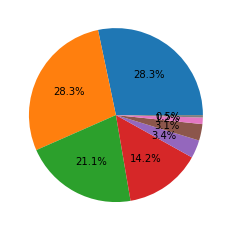

In [ ]:
#distribution of df  in piechart
plt.pie(df['label'].value_counts(), autopct = '%1.1f%%')
plt.show()

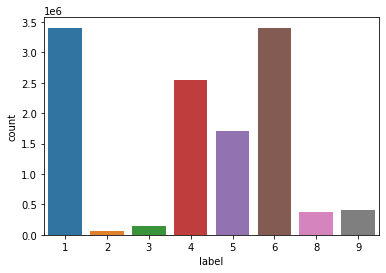

In [ ]:
#understanding our target variable
sns.countplot(df['label'])

In [ ]:
#checking the percentage of each class of the target variable present in the data
(df['label'].value_counts()/len(df['label']))*100

6    28.304522
1    28.290699
4    21.097820
5    14.218749
9     3.366464
8     3.061968
3     1.207560
2     0.452217
Name: label, dtype: float64

Observation:

The target variables are imbalanced!

#Correlation

Correlation is a statistical measure that expresses the extent to which two variables are linearly related 

In [7]:
df.corr()    #to view a features how much correlate to each other 

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
time,1.000000,-0.027670,-0.026418,0.034580,-0.005682,-0.003489,-0.005968,0.183277,0.065801,0.101489,-0.053175
acc_x,-0.027670,1.000000,0.053850,-0.062366,-0.006316,0.008142,-0.003950,-0.370609,0.006814,0.158879,0.079372
acc_y,-0.026418,0.053850,1.000000,-0.237107,-0.023554,0.004585,0.019732,0.011504,0.398470,0.548802,-0.071234
acc_z,0.034580,-0.062366,-0.237107,1.000000,0.012469,-0.009510,-0.010222,0.158448,-0.201538,-0.330254,-0.062789
gyr_x,-0.005682,-0.006316,-0.023554,0.012469,1.000000,-0.012665,-0.092292,-0.004920,-0.010452,-0.033407,-0.000546
gyr_y,-0.003489,0.008142,0.004585,-0.009510,-0.012665,1.000000,0.044312,-0.010082,0.006548,0.012324,0.002546
gyr_z,-0.005968,-0.003950,0.019732,-0.010222,-0.092292,0.044312,1.000000,0.005549,-0.007327,0.020724,0.000145
mag_x,0.183277,-0.370609,0.011504,0.158448,-0.004920,-0.010082,0.005549,1.000000,-0.290171,-0.099849,-0.071002
mag_y,0.065801,0.006814,0.398470,-0.201538,-0.010452,0.006548,-0.007327,-0.290171,1.000000,0.138158,-0.016132
mag_z,0.101489,0.158879,0.548802,-0.330254,-0.033407,0.012324,0.020724,-0.099849,0.138158,1.000000,0.010741


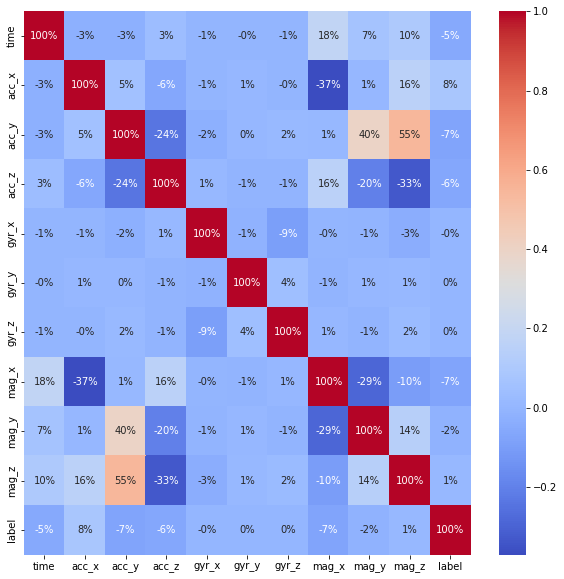

In [8]:
#checking the correlation between all the features(correlations means a mutual relationship or connection between two or more things.)
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor,annot = True, cmap='coolwarm',fmt = '.0%' )
plt.show()

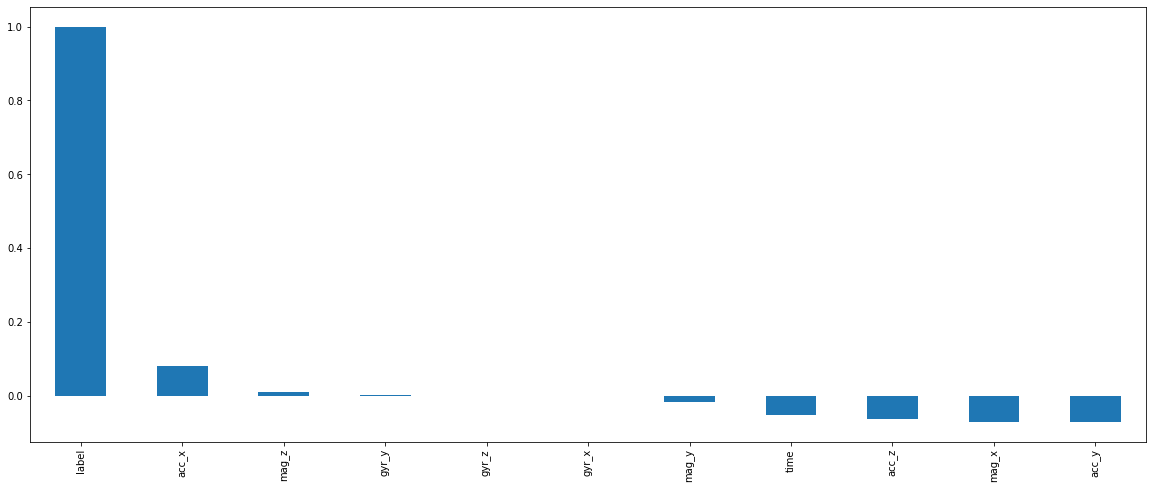

In [ ]:
plt.figure(figsize=(20,8))
df.corr()['label'].sort_values(ascending = False).plot(kind='bar')

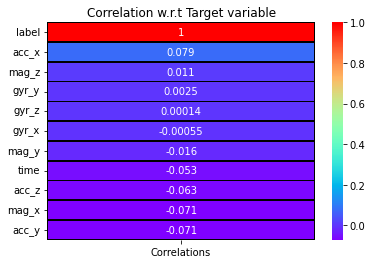

In [ ]:
corr = df.corrwith(df['label']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
sns.heatmap(corr,annot = True,cmap = 'rainbow',linewidths = 0.6,linecolor = 'black');
plt.title('Correlation w.r.t Target variable');

#Separating the dependent and independent variable

  Any predictive mathematical model tends to divide the observations (data) into dependent/ independent features in order to determine the causal effect. It should be noted that relationship between dependent and independent variables need not be linear, it can be polynomial.

In [9]:
#seperating the x and y variables
x = df.drop('label', axis = 1) #independent features  
#x = df.iloc[:,:-1]

y = df['label'] #dependent features
#y = df.iloc[:,-1]

In [10]:
#defining a variable named column_name n giving it all the column names expect label
column_name = ['time','acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x','mag_y', 'mag_z']

#outliers

  a value that "lies outside" (is much smaller or larger than) most of the other values in a set of data

In [11]:
# Using a for loop inside a function to get the box plots(seaborn) of all the columns
def identify_outliers(give_df_name, give_column_name):
    for i in column_name:
        fig = plt.figure(figsize=(6,8))
        sns.boxplot(data = x, y = i)
plt.show()

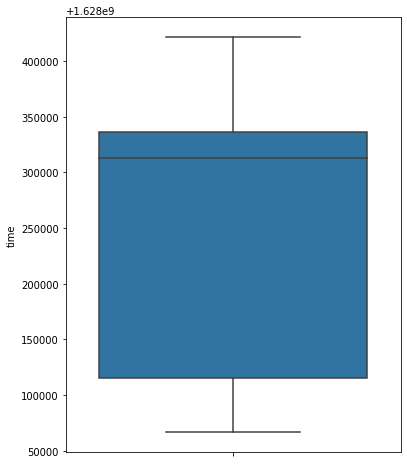

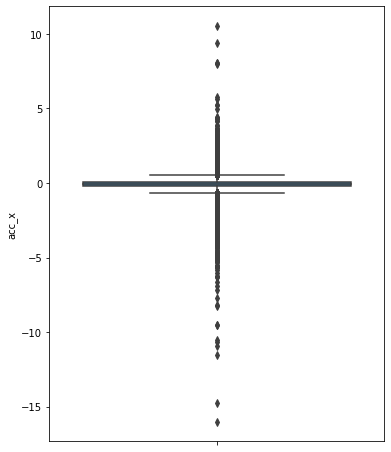

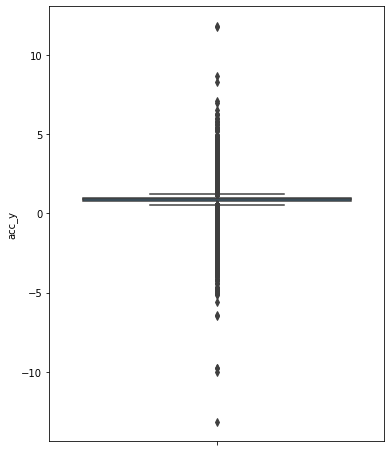

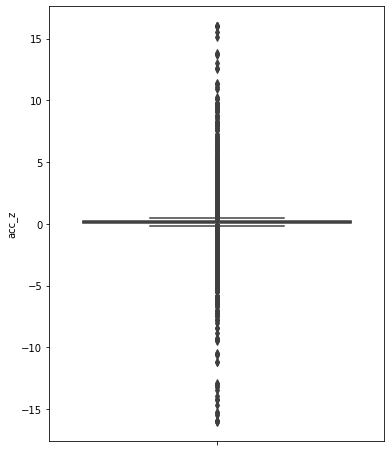

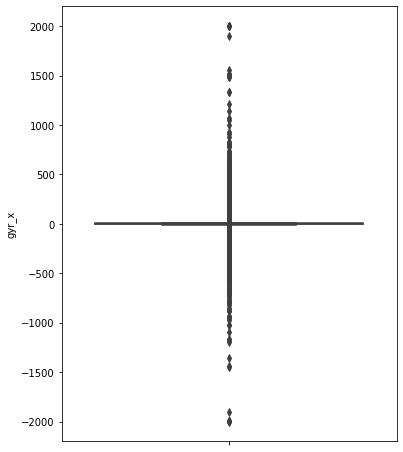

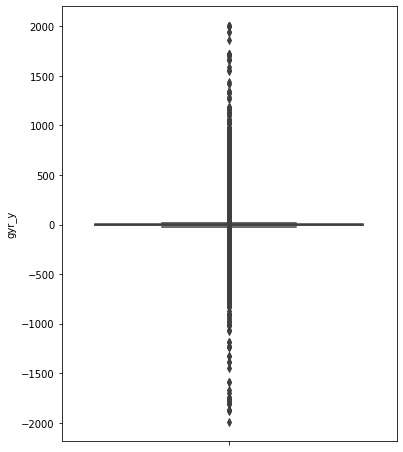

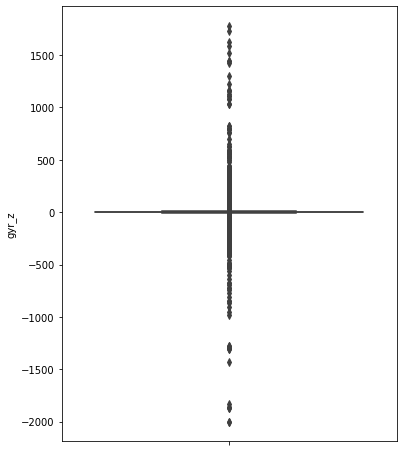

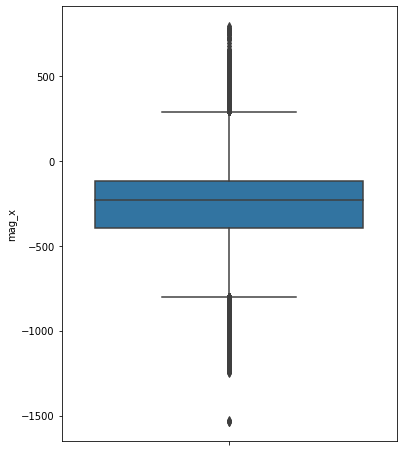

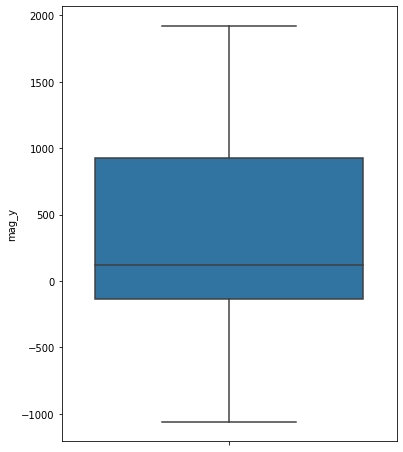

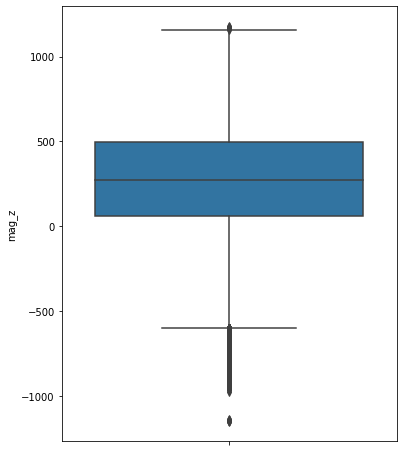

In [ ]:
identify_outliers(x, column_name)

Replacing the outliers with meadian value

In [ ]:
# Using a for loop inside a function to replace the outliers with median value
def replace_outlier(x, column_name):
    for i in column_name:
        print('column name : ',i)
        Q1 = np.percentile(x[i], 25)
        Q2 = np.percentile(x[i], 50)
        Q3 = np.percentile(x[i], 75)
        IQR = Q3 - Q1
        print('Q1 =',Q1,'Q2 = ',Q2,'Q3 = ',Q3)

        upper_val = Q3 + (1.5 * IQR)
        print('upper', upper_val)
        lower_val = Q1 - (1.5 * IQR)
        print('lower', lower_val)

        x.loc[x[i] > upper_val, i] = np.median(x[i])
        x.loc[x[i] < lower_val, i] = np.median(x[i])
        
        fig = plt.figure(figsize = (6,8))
        sns.boxplot(data = x,y = i)
        plt.xticks(rotation = 'horizontal')
        plt.show()

column name :  time
Q1 = 1628115313.0 Q2 =  1628312968.0 Q3 =  1628336209.0
upper 1628667553.0
lower 1627783969.0


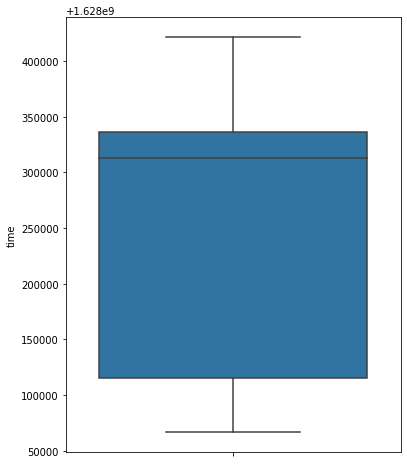

column name :  acc_x
Q1 = -0.2192383 Q2 =  -0.0576172 Q3 =  0.0878906
upper 0.54858395
lower -0.67993165


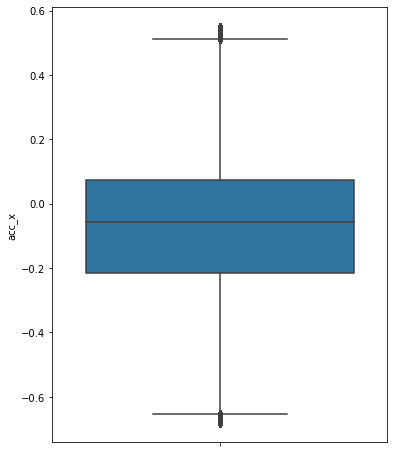

column name :  acc_y
Q1 = 0.8061524 Q2 =  0.9365235 Q3 =  0.975586
upper 1.2297364
lower 0.5520020000000001


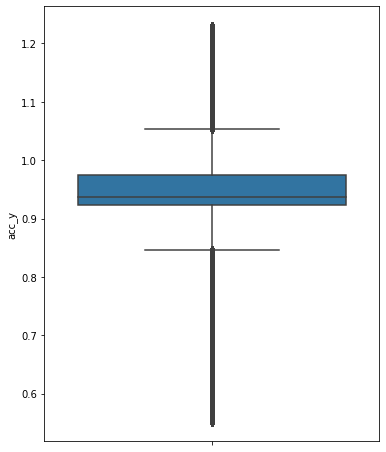

column name :  acc_z
Q1 = 0.0512695 Q2 =  0.1342773 Q3 =  0.2114258
upper 0.45166025
lower -0.18896495


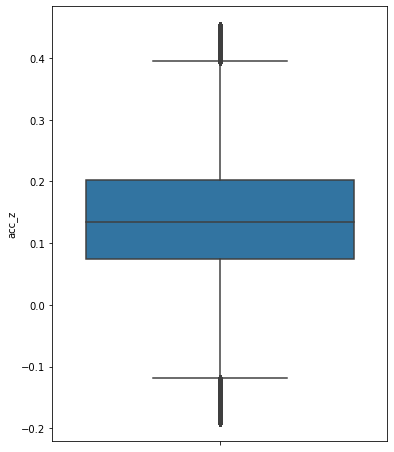

column name :  gyr_x
Q1 = -2.3193359 Q2 =  0.8544921999999998 Q3 =  3.90625
upper 13.244628850000002
lower -11.657714750000002


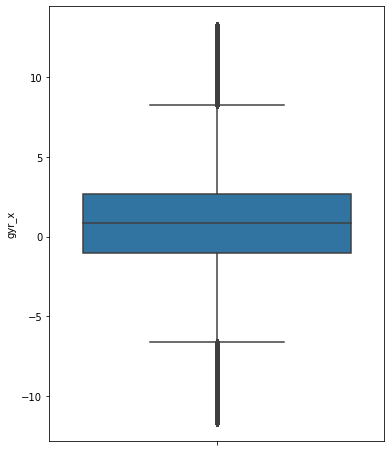

column name :  gyr_y
Q1 = -6.4697265 Q2 =  -1.8920898 Q3 =  2.6245117
upper 16.265869
lower -20.1110838


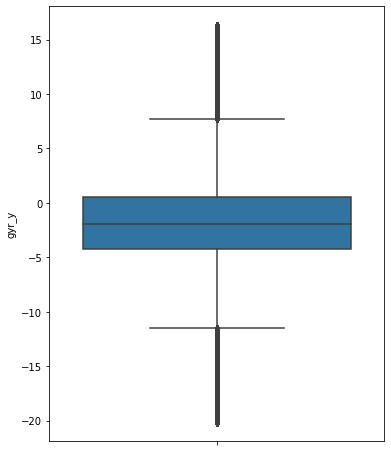

column name :  gyr_z
Q1 = -2.9907227 Q2 =  -0.6103516 Q3 =  1.7700195
upper 8.9111328
lower -10.131836


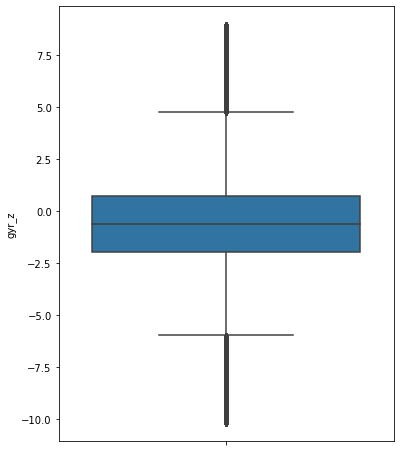

column name :  mag_x
Q1 = -393.0 Q2 =  -232.5 Q3 =  -120.0
upper 289.5
lower -802.5


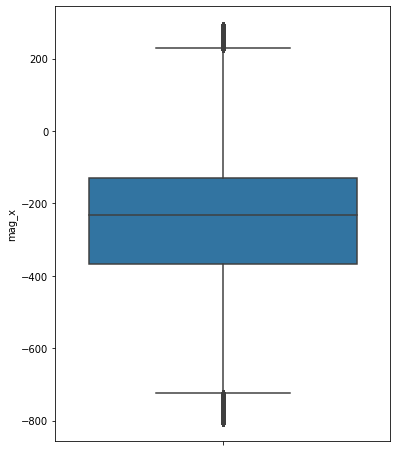

column name :  mag_y
Q1 = -133.5 Q2 =  120.0 Q3 =  927.0
upper 2517.75
lower -1724.25


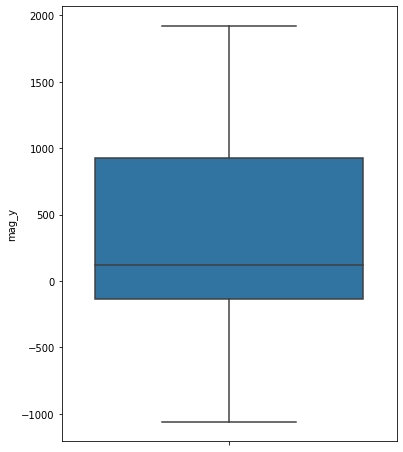

column name :  mag_z
Q1 = 58.5 Q2 =  270.0 Q3 =  498.0
upper 1157.25
lower -600.75


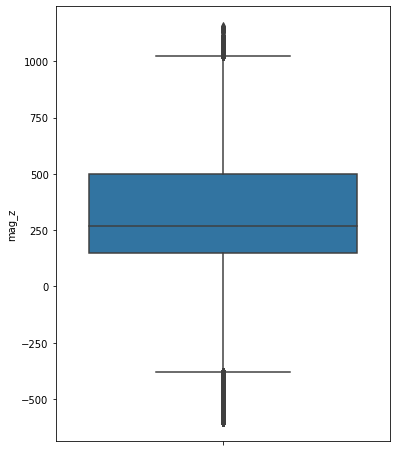

In [ ]:
replace_outlier(x, column_name)

looking for outliers after imputing with media

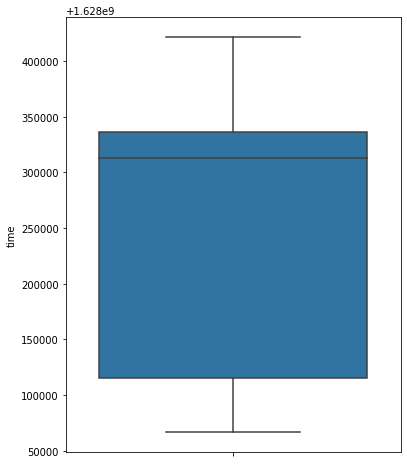

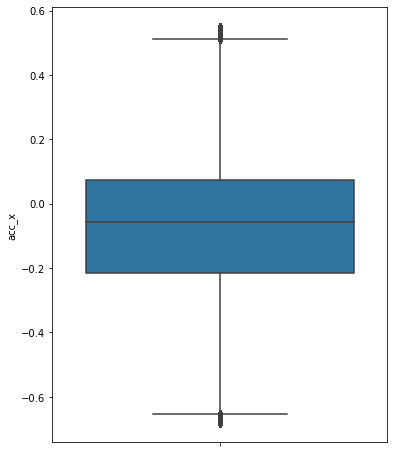

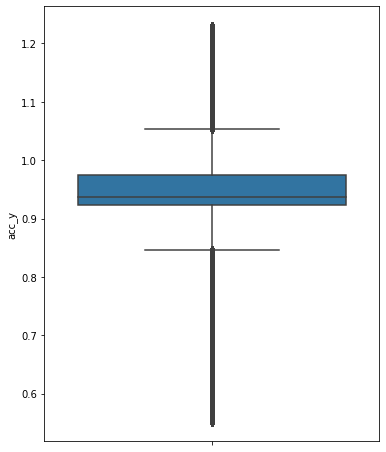

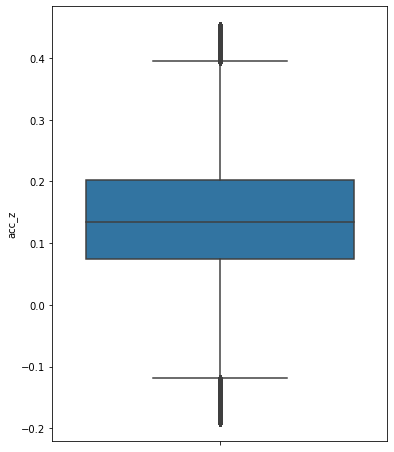

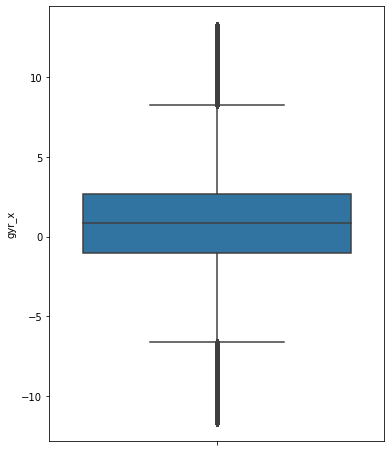

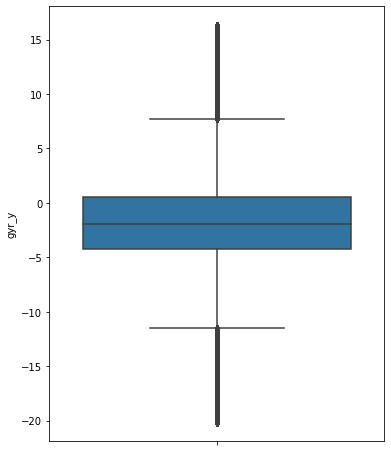

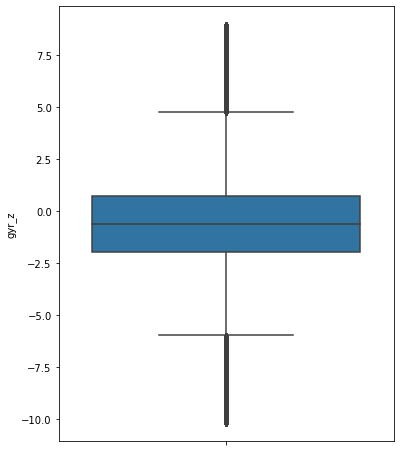

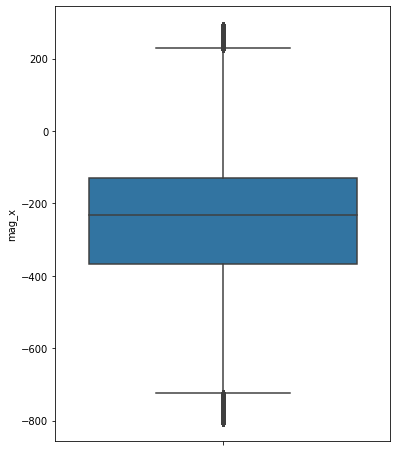

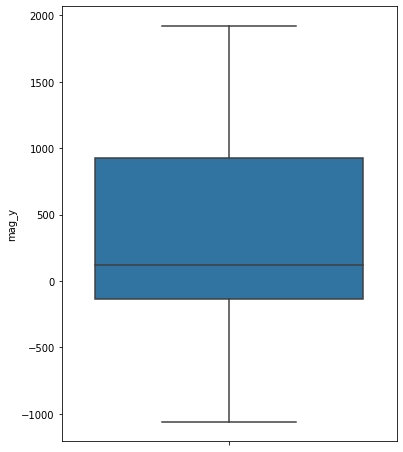

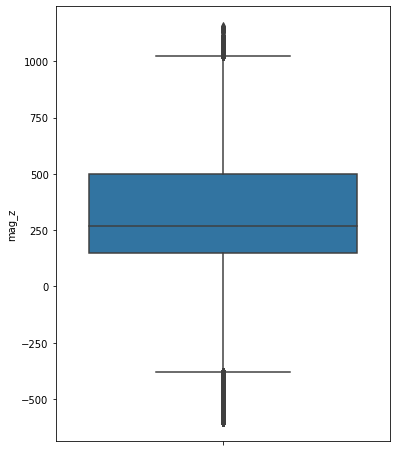

In [ ]:
identify_outliers(x, column_name)

Outliers are now imputed with the median value

#Normalization

Normalization is the process to eliminate data redundancy and enhance data integrity in the table 

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
scaling.fit_transform(x)

array([[0.03725611, 0.59633872, 0.56924942, ..., 0.43326886, 0.83820565,
        0.71428571],
       [0.03725611, 0.59821725, 0.57036414, ..., 0.43262411, 0.83366935,
        0.70656371],
       [0.03725611, 0.60446057, 0.56854539, ..., 0.44036106, 0.83215726,
        0.7020592 ],
       ...,
       [0.93311879, 0.61475561, 0.56283491, ..., 0.39200516, 0.65272177,
        0.58880309],
       [0.93311879, 0.61477402, 0.56320648, ..., 0.3926499 , 0.66078629,
        0.57657658],
       [0.93311879, 0.61475561, 0.56283491, ..., 0.38233398, 0.6577621 ,
        0.57722008]])

In [13]:
x_normalized = pd.DataFrame(scaling.fit_transform(x))
x_normalized.head(3)

,0,1,2,3,4,5,6,7,8,9
0,0.037256,0.596339,0.569249,0.509929,0.501984,0.488189,0.534097,0.433269,0.838206,0.714286
1,0.037256,0.598217,0.570364,0.509105,0.500076,0.487148,0.533806,0.432624,0.833669,0.706564
2,0.037256,0.604461,0.568545,0.506632,0.497696,0.487684,0.532416,0.440361,0.832157,0.702059


In [14]:
x_normalized = pd.DataFrame(scaling.fit_transform(x),columns = x.columns)
x_normalized.head(3)

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
0,0.037256,0.596339,0.569249,0.509929,0.501984,0.488189,0.534097,0.433269,0.838206,0.714286
1,0.037256,0.598217,0.570364,0.509105,0.500076,0.487148,0.533806,0.432624,0.833669,0.706564
2,0.037256,0.604461,0.568545,0.506632,0.497696,0.487684,0.532416,0.440361,0.832157,0.702059


#Feature Selection

Selecting KBest Features using chi2

we aim to select the features which are highly dependent on the response. 

In [15]:
#select k best
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [16]:
#ranking the features
select_k_best_rank_features = SelectKBest(score_func = chi2, k = 5)
k_best_features = select_k_best_rank_features.fit(x_normalized,y)

df_k_scores = pd.DataFrame(k_best_features.scores_, columns = ['score'])
dfcolumns = pd.DataFrame(x_normalized.columns)

k_best_feature_rank = pd.concat([dfcolumns, df_k_scores], axis = 1)

k_best_feature_rank.columns = ('features', 'k_score')
print(k_best_feature_rank.nlargest(6, 'k_score'))

  features        k_score
0     time  369291.876210
8    mag_y   84705.496364
7    mag_x   44704.675721
9    mag_z    5699.859296
2    acc_y     787.746265
1    acc_x     318.969470


From chi2 we see that the top 6 features are time, acc_x, mag_x, mag_y, acc_z, acc_y

In [17]:
new_df = x_normalized
new_df['label'] = y.values
new_df

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
0,0.037256,0.596339,0.569249,0.509929,0.501984,0.488189,0.534097,0.433269,0.838206,0.714286,2
1,0.037256,0.598217,0.570364,0.509105,0.500076,0.487148,0.533806,0.432624,0.833669,0.706564,2
2,0.037256,0.604461,0.568545,0.506632,0.497696,0.487684,0.532416,0.440361,0.832157,0.702059,2
3,0.037256,0.609120,0.564830,0.506342,0.496124,0.490470,0.530897,0.431979,0.835181,0.707207,2
4,0.037256,0.609857,0.561720,0.507609,0.499985,0.491373,0.528876,0.433269,0.832661,0.711068,2
...,...,...,...,...,...,...,...,...,...,...,...
12038234,0.933119,0.614590,0.562737,0.509059,0.500000,0.497864,0.530525,0.382979,0.651210,0.581081,4
12038235,0.933119,0.614664,0.563011,0.509090,0.500153,0.497696,0.530267,0.385558,0.658770,0.586873,4
12038236,0.933119,0.614756,0.562835,0.509120,0.500259,0.497665,0.530412,0.392005,0.652722,0.588803,4
12038237,0.933119,0.614774,0.563206,0.508784,0.500504,0.497635,0.530557,0.392650,0.660786,0.576577,4


#1 - df1 - Logistic Regression

Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set

In [ ]:
# taking a sample of 40,000
import random
df1 = new_df.sample(40000)
df1.shape

(40000, 11)

In [ ]:
df1['label'].value_counts()

6    11390
1    11328
4     8415
5     5619
9     1342
8     1230
3      487
2      189
Name: label, dtype: int64

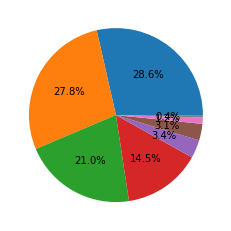

In [ ]:
#distribution of sample df1
plt.pie(df1['label'].value_counts(), autopct = '%1.1f%%');

In [ ]:
!-pip intall spikit-plot

/bin/bash: - : invalid option
Usage:	/bin/bash [GNU long option] [option] ...
	/bin/bash [GNU long option] [option] script-file ...
GNU long options:
	--debug
	--debugger
	--dump-po-strings
	--dump-strings
	--help
	--init-file
	--login
	--noediting
	--noprofile
	--norc
	--posix
	--rcfile
	--restricted
	--verbose
	--version
Shell options:
	-ilrsD or -c command or -O shopt_option		(invocation only)
	-abefhkmnptuvxBCHP or -o option


In [ ]:
#importing libraries 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score


# for smote
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE

Data Balancing using SMOTE : In order to cope with imbalanced data, there are 2 options :

Undersampling : Trim down the majority samples of the target variable.

Oversampling : Increase the minority samples of the target variable to the majority samples. we have decided to go with oversampling beacuse we might lose data if we do undersampling

For data balancing, we will use imblearn.

pip statement : !pip install imbalanced-learn

In [ ]:
# Splitting x and y variables
x1 = df1[['time' ,'acc_x', 'mag_x', 'mag_y', 'acc_z', 'acc_y']] #independent features
y1 = df1['label'] #dependent features

Taking only the 6 best features we got from chi2

In [ ]:
print(x1.shape, y1.shape)

(40000, 6) (40000,)


In [ ]:
#splitting the data
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.3, random_state = 0)
print(x1_train.shape, y1_train.shape, x1_test.shape)
print('Classes and number of values in trainset before SMOTE:',Counter(y1_train),'\n')

# applying smote to handle imbalance in the target variable
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x1_train,y1_train = oversample.fit_resample(x1_train,y1_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y1_train),'\n')

# importing Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 1000, multi_class = 'multinomial',penalty='none')

#fitting the logistic regression model to x1_train and y1_train
classifier_lr.fit(x1_train, y1_train)
y1_pred = classifier_lr.predict(x1_test)
print('model.predict :',y1_pred)
print('model.score :', classifier_lr.score(x1_train, y1_train))

#accuracy_score
from sklearn.metrics import accuracy_score
accuracy_lr = accuracy_score(y1_test, y1_pred)
print('Accuracy : ',accuracy_lr)

from sklearn.model_selection import cross_val_score
cv_scores_lr = cross_val_score(classifier_lr, x1, y1, cv=5)
print('Cross Validation scores :', cv_scores_lr)

mean_cv_lr = (np.mean(cv_scores_lr))*100
print('Mean cv :',mean_cv_lr)

(28000, 6) (28000,) (12000, 6)
Classes and number of values in trainset before SMOTE: Counter({6: 8027, 1: 7944, 4: 5898, 5: 3891, 9: 912, 8: 850, 3: 344, 2: 134}) 

Classes and number of values in trainset after SMOTE: Counter({6: 8027, 1: 8027, 5: 8027, 4: 8027, 8: 8027, 2: 8027, 9: 8027, 3: 8027}) 

model.predict : [6 6 5 ... 4 9 4]
model.score : 0.37422137784975706
Accuracy :  0.29033333333333333
Cross Validation scores : [0.4185   0.43325  0.421375 0.41325  0.428625]
Mean cv : 42.29999999999999


In [ ]:
#f1_score
f1_score_lr = f1_score(y1_test, y1_pred, average='weighted')
print('F1-score (average = weighted): {:.2f}'.format(f1_score_lr))

#precision
precision_score_lr = precision_score(y1_test, y1_pred, average='weighted')
print('Precision (average = weighted): {:.2f}'.format(precision_score_lr))

#recall
recall_score_lr = recall_score(y1_test, y1_pred, average='weighted')
print('Recall (average = weighted): {:.2f}'.format(recall_score_lr))

F1-score (average = weighted): 0.27
Precision (average = weighted): 0.46
Recall (average = weighted): 0.29


#2 - df2 - Decision Tree Classifier

The decision tree classifier creates the classification model by building a decision tree. Each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute.

In [ ]:
# taking a sample of 40,000
import random
df2 = new_df.sample(40000)
df2.shape

(40000, 11)

In [ ]:
df2['label'].value_counts()

1    11362
6    11236
4     8537
5     5686
9     1278
8     1225
3      508
2      168
Name: label, dtype: int64

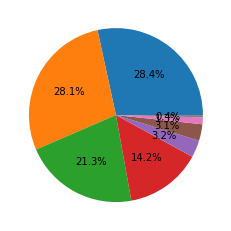

In [ ]:
#distribution of sample df2
plt.pie(df2['label'].value_counts(), autopct = '%1.1f%%');

In [ ]:
# Splitting x and y variables
x2 = df2[['time' ,'acc_x', 'mag_x', 'mag_y', 'acc_z', 'acc_y']] #independent features
y2 = df2['label'] #dependent features
print(x2.shape, y2.shape)

(40000, 6) (40000,)


In [ ]:
#splitting the data
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.3, random_state = 0)
print(x2_train.shape, y2_train.shape, x2_test.shape)
print('Classes and number of values in trainset before SMOTE:',Counter(y2_train),'\n')

#smote
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x2_train,y2_train = oversample.fit_resample(x2_train,y2_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y2_train),'\n')

#importing Decision Trees
from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier(random_state=1000,max_depth=15,min_samples_leaf = 1)

classifier_dtc.fit(x2_train, y2_train)
y2_pred = classifier_dtc.predict(x2_test)
print('model.predict :',y2_pred)
print('model.score :', classifier_dtc.score(x2_train, y2_train))

from sklearn.metrics import accuracy_score
accuracy_dtc = accuracy_score(y2_test, y2_pred)
print('Accuracy : ',accuracy_dtc)

from sklearn.model_selection import cross_val_score
cv_scores_dtc = cross_val_score(classifier_dtc, x2, y2, cv=5)
print('Cross Validation scores :', cv_scores_dtc)

mean_cv_dtc = (np.mean(cv_scores_dtc))*100
print('Mean cv :',mean_cv_dtc)

(28000, 6) (28000,) (12000, 6)
Classes and number of values in trainset before SMOTE: Counter({6: 7896, 1: 7859, 4: 6057, 5: 3989, 9: 879, 8: 873, 3: 324, 2: 123}) 

Classes and number of values in trainset after SMOTE: Counter({5: 7896, 6: 7896, 1: 7896, 2: 7896, 8: 7896, 4: 7896, 9: 7896, 3: 7896}) 

model.predict : [4 4 4 ... 9 4 1]
model.score : 0.9657579787234043
Accuracy :  0.9211666666666667
Cross Validation scores : [0.945    0.947375 0.9365   0.941375 0.938375]
Mean cv : 94.17249999999999


In [ ]:
f1_score_dtc = f1_score(y2_test, y2_pred, average='weighted')
print('F1-score (average = weighted): {:.2f}'.format(f1_score_dtc))

precision_score_dtc = precision_score(y2_test, y2_pred, average='weighted')
print('Precision (average = weighted): {:.2f}'.format(precision_score_dtc))

recall_score_dtc = recall_score(y2_test, y2_pred, average='weighted')
print('Recall (average = weighted): {:.2f}'.format(recall_score_dtc))

F1-score (average = weighted): 0.93
Precision (average = weighted): 0.93
Recall (average = weighted): 0.92


#3 - df3 - Random Forest Classifier

 It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

In [ ]:
import random
df3 = new_df.sample(40000)

In [ ]:
df3['label'].value_counts()

1    11351
6    11220
4     8537
5     5611
9     1360
8     1257
3      472
2      192
Name: label, dtype: int64

In [ ]:
# Splitting x and y variables
x3 = df3[['time' ,'acc_x', 'mag_x', 'mag_y', 'acc_z', 'acc_y']] #independent features
y3 = df3['label'] #dependent features
print(x3.shape, y3.shape)

(40000, 6) (40000,)


In [ ]:
#splitting the data
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.3, random_state = 0)
print('Classes and number of values in trainset before SMOTE:',Counter(y3_train),'\n')

#smote
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x3_train,y3_train = oversample.fit_resample(x3_train,y3_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y3_train),'\n')


from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=20, random_state=23)

classifier_rf.fit(x3_train, y3_train)
y3_pred = classifier_rf.predict(x3_test)
print('model.predict :',y3_pred)
print('model.score :', classifier_rf.score(x3_train, y3_train))

from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(y3_test, y3_pred)
print('Accuracy : ',accuracy_rf)

from sklearn.model_selection import cross_val_score
cv_scores_rf = cross_val_score(classifier_rf, x3, y3, cv=5)
print('Cross Validation scores :', cv_scores_rf)

mean_accuracy_rf = (np.mean(cv_scores_rf))*100
print('Mean Accuracy :',mean_accuracy_rf)

Classes and number of values in trainset before SMOTE: Counter({1: 8019, 6: 7780, 4: 5990, 5: 3915, 9: 934, 8: 893, 3: 333, 2: 136}) 

Classes and number of values in trainset after SMOTE: Counter({5: 8019, 1: 8019, 4: 8019, 6: 8019, 9: 8019, 8: 8019, 3: 8019, 2: 8019}) 

model.predict : [5 6 6 ... 9 5 4]
model.score : 0.9998441202144905
Accuracy :  0.9395833333333333
Cross Validation scores : [0.946    0.945625 0.940125 0.938875 0.942875]
Mean Accuracy : 94.27


In [ ]:
f1_score_rf = f1_score(y3_test, y3_pred, average='weighted')
print('F1-score (average = weighted): {:.2f}'.format(f1_score_rf))

precision_score_rf = precision_score(y3_test, y3_pred, average='weighted')
print('Precision (average = weighted): {:.2f}'.format(precision_score_rf))

recall_score_rf = recall_score(y3_test, y3_pred, average='weighted')
print('Recall (average = weighted): {:.2f}'.format(recall_score_rf))

F1-score (average = weighted): 0.94
Precision (average = weighted): 0.94
Recall (average = weighted): 0.94


#4 - df4 - Support Vector Classifier

Support Vector Machine(SVM) is a supervised machine learning algorithm used for both classification and regression. Though we say regression problems as well its best suited for classification. The objective of SVM algorithm is to find a hyperplane in an N-dimensional space that distinctly classifies the data points

In [ ]:
import random
df4 = new_df.sample(40000)

In [ ]:
df4['label'].value_counts()

1    11401
6    11393
4     8382
5     5617
9     1389
8     1209
3      431
2      178
Name: label, dtype: int64

In [ ]:
# Splitting x and y variables
x4 = df4[['time' ,'acc_x', 'mag_x', 'mag_y', 'acc_z', 'acc_y']] #independent features
y4 = df4['label'] #dependent features
print(x4.shape, y4.shape)

(40000, 6) (40000,)


In [ ]:
#splitting the data
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size = 0.3, random_state = 0)
print('Classes and number of values in trainset before SMOTE:',Counter(y4_train),'\n')

#smote
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x4_train,y4_train = oversample.fit_resample(x4_train,y4_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y4_train),'\n')


from sklearn.svm import SVC
classifier_svc=SVC(decision_function_shape='ovo')


classifier_svc.fit(x4_train, y4_train)
y4_pred = classifier_svc.predict(x4_test)
print('model.predict :',y4_pred)
print('model.score :', classifier_svc.score(x4_train, y4_train))

from sklearn.metrics import accuracy_score
accuracy_svc = accuracy_score(y4_test, y4_pred)
print('Accuracy : ',accuracy_svc)

from sklearn.model_selection import cross_val_score
cv_scores_svc = cross_val_score(classifier_svc, x4, y4, cv=5)
print('Cross Validation scores :', cv_scores_svc)

mean_cv_svc = (np.mean(cv_scores_svc))*100
print('Mean cv :',mean_cv_svc)

Classes and number of values in trainset before SMOTE: Counter({6: 7998, 1: 7938, 4: 5903, 5: 3938, 9: 967, 8: 851, 3: 289, 2: 116}) 

Classes and number of values in trainset after SMOTE: Counter({6: 7998, 4: 7998, 1: 7998, 5: 7998, 9: 7998, 8: 7998, 3: 7998, 2: 7998}) 

model.predict : [1 5 1 ... 1 4 6]
model.score : 0.6832489372343086
Accuracy :  0.6060833333333333
Cross Validation scores : [0.67575  0.68725  0.679625 0.66875  0.67575 ]
Mean cv : 67.7425


#5 - df5 - KNearest Neighbors

the k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems.

it's easy to implement and understand, but has a major drawback of becoming significantly slows as the size of that data in use grows.

In [ ]:
import random
df5 = new_df.sample(40000)

In [ ]:
df5['label'].value_counts()

6    11406
1    11199
4     8350
5     5798
9     1374
8     1219
3      467
2      187
Name: label, dtype: int64

In [ ]:
# Splitting x and y variables
x5 = df5[['time' ,'acc_x', 'mag_x', 'mag_y', 'acc_z', 'acc_y']] #independent features
y5 = df5['label'] #dependent features

In [ ]:
#splitting the data
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size = 0.3, random_state = 0)
print('Classes and number of values in trainset before SMOTE:',Counter(y5_train),'\n')

#smote
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x5_train,y5_train = oversample.fit_resample(x5_train,y5_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y5_train),'\n')


from sklearn.neighbors import KNeighborsClassifier
classifier_knn= KNeighborsClassifier()

classifier_knn.fit(x5_train, y5_train)
y5_pred = classifier_knn.predict(x5_test)
print('model.predict :',y5_pred)
print('model.score :', classifier_knn.score(x5_train, y5_train))

from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y5_test, y5_pred)
print('Accuracy : ',accuracy_knn)

from sklearn.model_selection import cross_val_score
cv_scores_knn = cross_val_score(classifier_knn, x5, y5, cv=5)
print('Cross Validation scores :', cv_scores_knn)

mean_cv_knn = (np.mean(cv_scores_knn))*100
print('Mean cv :',mean_cv_knn)

Classes and number of values in trainset before SMOTE: Counter({6: 8026, 1: 7816, 4: 5806, 5: 4075, 9: 960, 8: 854, 3: 330, 2: 133}) 

Classes and number of values in trainset after SMOTE: Counter({5: 8026, 6: 8026, 9: 8026, 1: 8026, 8: 8026, 4: 8026, 3: 8026, 2: 8026}) 

model.predict : [5 6 6 ... 6 1 1]
model.score : 0.9608148517318714
Accuracy :  0.8679166666666667
Cross Validation scores : [0.888625 0.88675  0.883    0.889625 0.88625 ]
Mean cv : 88.68500000000002


In [ ]:
f1_score_knn = f1_score(y5_test, y5_pred, average='weighted')
print('F1-score (average = weighted): {:.2f}'.format(f1_score_knn))

precision_score_knn = precision_score(y5_test, y5_pred, average='weighted')
print('Precision (average = weighted): {:.2f}'.format(precision_score_knn))

recall_score_knn = recall_score(y5_test, y5_pred, average='weighted')
print('Recall (average = weighted): {:.2f}'.format(recall_score_knn))

F1-score (average = weighted): 0.87
Precision (average = weighted): 0.88
Recall (average = weighted): 0.87


#6- df6 - XGBoost Classifier

XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

In [ ]:
import random     
df6 = new_df.sample(40000)

In [ ]:
df6['label'].value_counts()

1    11372
6    11113
4     8505
5     5745
9     1348
8     1247
3      483
2      187
Name: label, dtype: int64

In [ ]:
# Splitting x and y variables
x6 = df6[['time' ,'acc_x', 'mag_x', 'mag_y', 'acc_z', 'acc_y']] #independent features
y6 = df6['label'] #dependent features

In [ ]:
###### splitting the data
x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y6, test_size = 0.3, random_state = 0)
print('Classes and number of values in trainset before SMOTE:',Counter(y6_train),'\n')

#smote
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x6_train,y6_train = oversample.fit_resample(x6_train,y6_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y6_train),'\n')

from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 15,n_estimators = 1000)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y6 = le.fit_transform(y6)


classifier_xgb.fit(x6_train, y6_train)
y6_pred = classifier_xgb.predict(x6_test)
print('model.predict :',y6_pred)
print('model.score :', classifier_xgb.score(x6_train, y6_train))

from sklearn.metrics import accuracy_score
accuracy_xgb = accuracy_score(y6_test, y6_pred)
print('Accuracy : ',accuracy_xgb)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y7 = le.fit_transform(y6)

from sklearn.model_selection import cross_val_score
cv_scores_xgb = cross_val_score(classifier_xgb, x6, y6, cv=5)
print('Cross Validation scores :', cv_scores_xgb)

mean_cv_xgb = (np.mean(cv_scores_xgb))*100
print('Mean cv :',mean_cv_xgb)

Classes and number of values in trainset before SMOTE: Counter({1: 7907, 6: 7857, 4: 5976, 5: 3967, 9: 970, 8: 829, 3: 359, 2: 135}) 

Classes and number of values in trainset after SMOTE: Counter({3: 7907, 6: 7907, 4: 7907, 8: 7907, 1: 7907, 5: 7907, 9: 7907, 2: 7907}) 

model.predict : [6 6 1 ... 1 5 4]
model.score : 0.999952573668901
Accuracy :  0.9706666666666667
Cross Validation scores : [0.98325  0.9835   0.981    0.98     0.982375]
Mean cv : 98.20249999999999


In [ ]:
f1_score_xgb = f1_score(y6_test, y6_pred, average='weighted')
print('F1-score (average = weighted): {:.2f}'.format(f1_score_xgb))

precision_score_xgb = precision_score(y6_test, y6_pred, average='weighted')
print('Precision (average = weighted): {:.2f}'.format(precision_score_xgb))

recall_score_xgb = recall_score(y6_test, y6_pred, average='weighted')
print('Recall (average = weighted): {:.2f}'.format(recall_score_xgb))

F1-score (average = weighted): 0.97
Precision (average = weighted): 0.97
Recall (average = weighted): 0.97
